In [1]:
import os

import pandas as pd
import numpy as np
import pandas_datareader.data as pdr 

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import seaborn as sns
plt.style.use('seaborn-whitegrid')
from pylab import rcParams
%matplotlib inline
import itertools

import warnings 
warnings.filterwarnings(action='ignore')

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [32]:
def mse(y,pred):
    return mean_squared_error(y,pred)

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def MAPE(y,pred):
    return np.mean(np.abs((y-pred)/y)*100)    


def evaluate_regr(y,pred): # 종합 평가지표 
    mse_val = mse(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    mape_val = np.mean(np.abs((y-pred)/y)*100)
    smape_val = 100 / len(y) * np.sum(np.abs(pred - y) / (np.abs(y) + np.abs(pred)))
    print("MSE:{0:4F},RMSE:{1:4f},MAE:{2:4F},MAPE:{3:4F},SMAPE:{4:4F}".format(mse_val,rmse_val,mae_val,mape_val,smape_val))

In [3]:
#한글폰트 적용
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [4]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('월별 총물동량.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

In [5]:
split = -63
train_data = data['TEU'][0:split] 
test_data = data['TEU'][split:] 

### Trend

In [12]:
Trend = pd.read_csv('Trend예측값_GRU.csv')
Trend['Date'] = pd.to_datetime(Trend['Date'])
Trend = Trend.set_index('Date')
Trend.head()

,prediction
Date,
2017-01-31,1691724.9
2017-02-28,1693096.9
2017-03-31,1695356.2
2017-04-30,1701776.2
2017-05-31,1705854.9


### Seasonal

In [13]:
Seasonal = pd.read_csv('Seasonal예측값_BiLSTM.csv')
Seasonal['Date'] = pd.to_datetime(Seasonal['Date'])
Seasonal = Seasonal.set_index('Date')
Seasonal.head()

,prediction
Date,
2017-01-31,-21078.205
2017-02-28,-116759.030
2017-03-31,63525.523
2017-04-30,39400.800
2017-05-31,47884.605


### Residuals

In [14]:
Residuals = pd.read_csv('Resid예측값_BiLSTM.csv')
Residuals['Date'] = pd.to_datetime(Residuals['Date'])
Residuals = Residuals.set_index('Date')
Residuals.head()

,prediction
Date,
2017-01-31,-7910.0312
2017-02-28,-8028.9260
2017-03-31,-15904.3300
2017-04-30,5520.8820
2017-05-31,21914.3830


### Trend + Seasonal + Residuals

In [18]:
pred = Trend['prediction'] + Seasonal['prediction'] + Residuals['prediction']

RMSE: 52053.10909306082
MSE: 2709526166.254091
MAE: 41032.959640317466
RMSE: 52053.10909306082
MAPE: 2.2479808402882226


Text(0.5, 1.0, 'Trend(GRU) + Seasonal(Bidirectional LSTM) + Residuals(Bidirectional LSTM)')

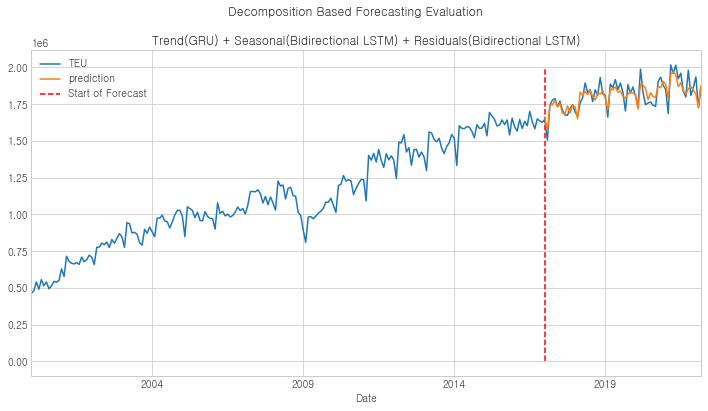

In [36]:
rmse = np.sqrt(mean_squared_error(test_data, pred))
print('RMSE: '+str(rmse))
mse = mean_squared_error(test_data, pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, pred)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(pred, test_data))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs((test_data-pred)/test_data)*100)
print('MAPE: '+str(mape))

full_data_evaluation = pd.concat([data['TEU'], pred], axis=1)
ax = full_data_evaluation.plot()
ax.vlines('2017-01',0,2000000,linestyle='--',color='r',label='Start of Forecast')
rcParams['figure.figsize'] = 12, 6
fig = ax.get_figure()
ax.legend(loc='upper left')
plt.suptitle('Decomposition Based Forecasting Evaluation')
plt.title('Trend(GRU) + Seasonal(Bidirectional LSTM) + Residuals(Bidirectional LSTM)')